<a href="https://colab.research.google.com/github/TW-ZiJieLin/FiniteDifference/blob/main/Finite_Difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def FiniteDifference( x, y = None, neighbor = 2 ):
  if y: #for 2 inputs
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return
    y_diff = [ ( y[i+neighbor] - y[i] )/( x[i+neighbor] - x[i] ) for i in range(len(y)-neighbor) ]
    y_diff = y_diff + [y_diff[-1]]+ [y_diff[-1]]
    return y_diff
  else: #for 1 input
    x = [x[0]+(neighbor-i)*(x[0]-x[1]) for i in range(neighbor)] +x+ [x[-1]+(i+1)*(x[-1]-x[-2]) for i in range(neighbor)]
    x_diff = [ ( x[i+2*neighbor] - x[i] ) / 2*neighbor for i in range(len(x)-2*neighbor) ]
    return x_diff

In [ ]:
def FiniteDifference2( x, y = None, neighbor = 2 ):
  if y: #for 2 inputs
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return
    y_diff = [ ( y[i+2*neighbor] - y[i] )/( x[i+2*neighbor] - x[i] ) for i in range(len(y)-2*neighbor) ]
    y_diff = [ ( y[i+neighbor] - y[0] )/( x[i+neighbor] - x[0] ) for i in range(neighbor)] + y_diff +\
        [ ( y[-1] - y[-2*neighbor+i] )/( x[-1] - x[-2*neighbor+i] ) for i in range(neighbor)]
    return y_diff
  else: #for 1 input
    x = [x[0]+(neighbor-i)*(x[0]-x[1]) for i in range(neighbor)] +x+ [x[-1]+(i+1)*(x[-1]-x[-2]) for i in range(neighbor)]
    x_diff = [ ( x[i+2*neighbor] - x[i] ) / 2*neighbor for i in range(len(x)-2*neighbor) ]
    return x_diff

In [ ]:
def FiniteDifference3( x, y = None, neighbor = 2 ):
  if y: #for 2 inputs
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return
    y_diff = [ ( y[i+neighbor] - y[i] )/( x[i+neighbor] - x[i] ) for i in range(len(y)-neighbor) ]
    y_diff = [y_diff[0]] +[y_diff[0]] + y_diff
    return y_diff
  else: #for 1 input
    x = [x[0]+(neighbor-i)*(x[0]-x[1]) for i in range(neighbor)] +x+ [x[-1]+(i+1)*(x[-1]-x[-2]) for i in range(neighbor)]
    x_diff = [ ( x[i+2*neighbor] - x[i] ) / 2*neighbor for i in range(len(x)-2*neighbor) ]
    return x_diff

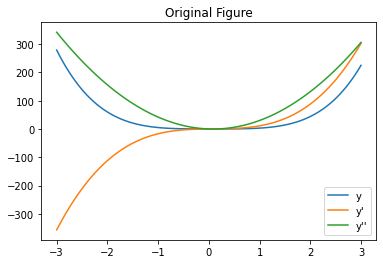

In [ ]:
n = 101
begin = -3
end = 3
x = [ begin+(end-begin)*i/(n-1) for i in range(n) ]

y = [ 3*x[i]**4-x[i]**3+x[i]**2 for i in range(n) ]
y_diff = [ 12*x[i]**3-3*x[i]**2+2*x[i] for i in range(n) ]
y_diff2 = [ 36*x[i]**2-6*x[i] for i in range(n) ]
# y = [ x[i]**2 for i in range(n) ]
# y_diff = [ 2*x[i] for i in range(n) ]
# y_diff2 = [ 2 for i in range(n) ]

plt.plot(x,y,x,y_diff,x,y_diff2)
plt.title("Original Figure")
plt.legend(["y","y'","y''"])
plt.show()

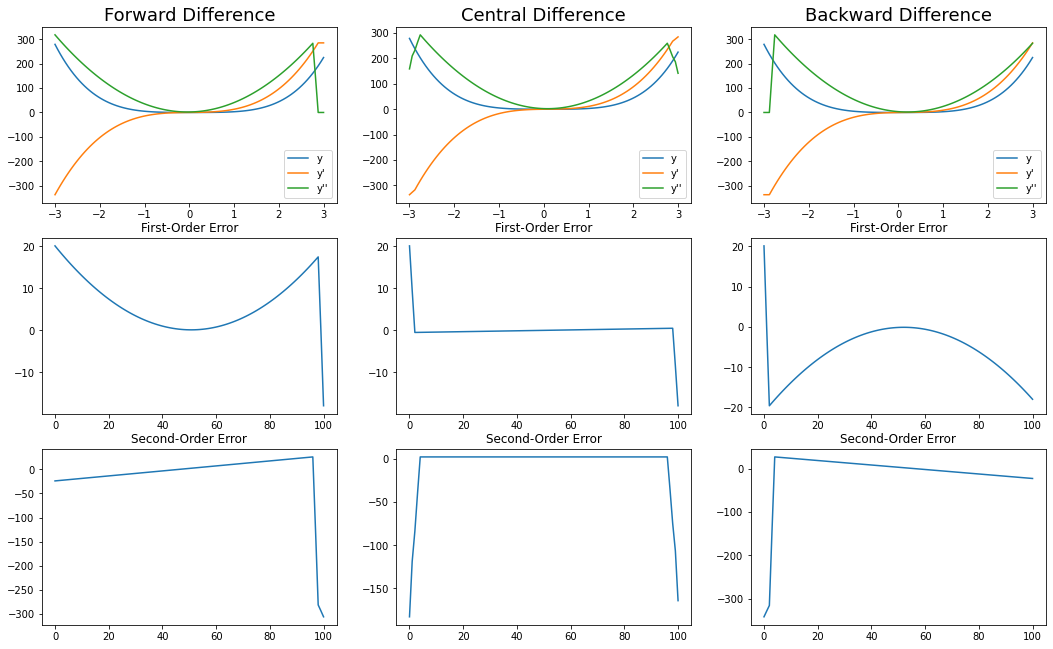

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(18,11))

F_y_diff = FiniteDifference( x,y )
F_y_diff2 = FiniteDifference( x,F_y_diff )
axes[0,0].plot(x,y,x,F_y_diff,x,F_y_diff2)
# axes[0,0].plot(x,y,x,y_diff,x,y_diff2)
axes[1,0].plot([ F_y_diff[i]-y_diff[i] for i in range(len(y_diff))])
axes[2,0].plot([ F_y_diff2[i]-y_diff2[i] for i in range(len(y_diff))])
aF_y_diff = F_y_diff
aF_y_diff2 = F_y_diff2

F_y_diff = FiniteDifference2( x,y )
F_y_diff2 = FiniteDifference2( x,F_y_diff )
axes[0,1].plot(x,y,x,F_y_diff,x,F_y_diff2)
axes[1,1].plot([ F_y_diff[i]-y_diff[i] for i in range(len(y_diff))])
axes[2,1].plot([ F_y_diff2[i]-y_diff2[i] for i in range(len(y_diff))])
bF_y_diff = F_y_diff
bF_y_diff2 = F_y_diff2

F_y_diff = FiniteDifference3( x,y )
F_y_diff2 = FiniteDifference3( x,F_y_diff )
axes[0,2].plot(x,y,x,F_y_diff,x,F_y_diff2)
axes[1,2].plot([ F_y_diff[i]-y_diff[i] for i in range(len(y_diff))])
axes[2,2].plot([ F_y_diff2[i]-y_diff2[i] for i in range(len(y_diff))])
cF_y_diff = F_y_diff
cF_y_diff2 = F_y_diff2

axes[0,0].set_title("Forward Difference",fontsize=18)
axes[0,1].set_title("Central Difference",fontsize=18)
axes[0,2].set_title("Backward Difference",fontsize=18)
for i in range(3):
  axes[0,i].legend(["y","y'","y''"])
  axes[1,i].set_title("First-Order Error")
  axes[2,i].set_title("Second-Order Error")
plt.show()